<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/71_property_assessment_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vaasudevan Srinivasan 🧑🏻‍💻  
StratagemGIS Solutions

In [1]:
import itertools

import geopandas as gpd
import imageio
import matplotlib.pyplot as plt
import pooch
from shapely.geometry import box

In [2]:
assessments_file = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/vector/geonb_property_assessment.feather',
    known_hash='37879e95a234085249c23b7217ac4654e02730a845d64671a2ea1a87b6e94652'
)

In [3]:
years = list(itertools.pairwise(map(str, range(2018, 2025))))

extent = box(*[
    2486790.94054768281057477,
    7437920.02525833249092102,
    2490199.54119797190651298,
    7439764.25761017389595509
])

df = (
    gpd.read_feather(assessments_file)
    .query('geometry.within(@extent)')
    .dropna()
    .reset_index(drop=True)
)

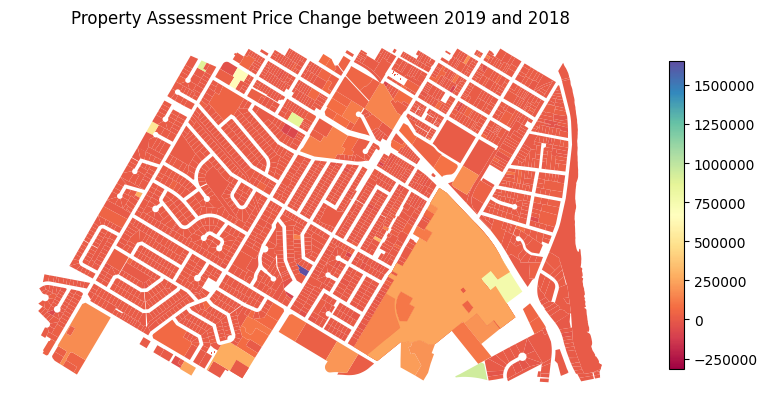

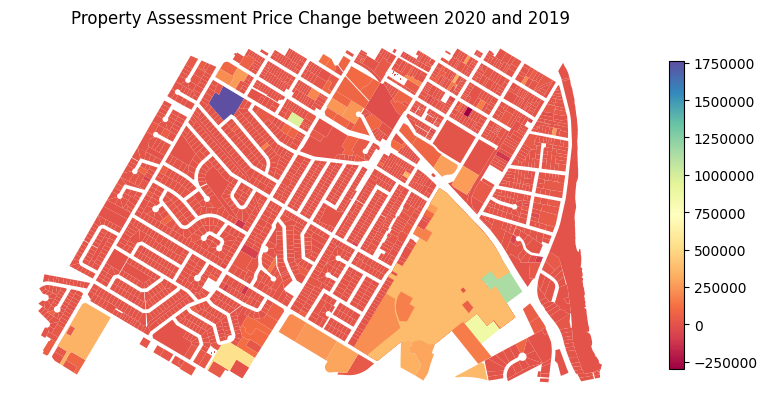

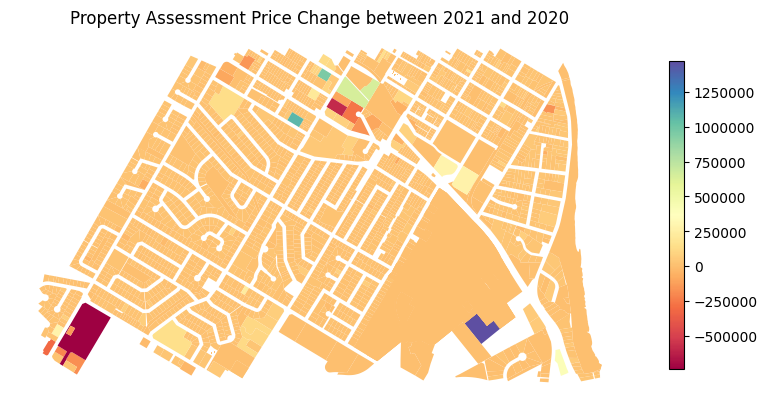

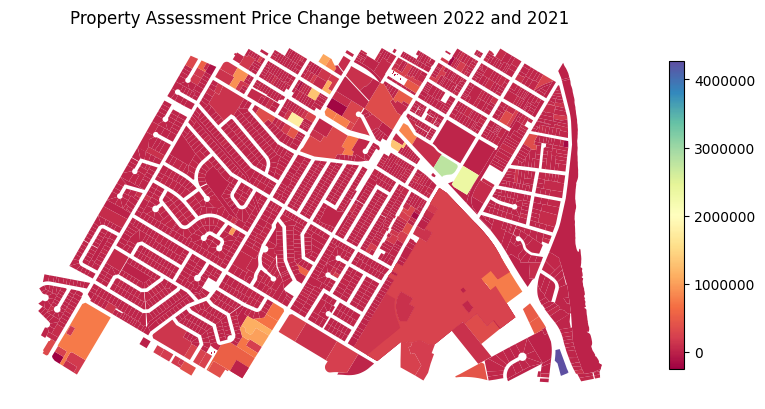

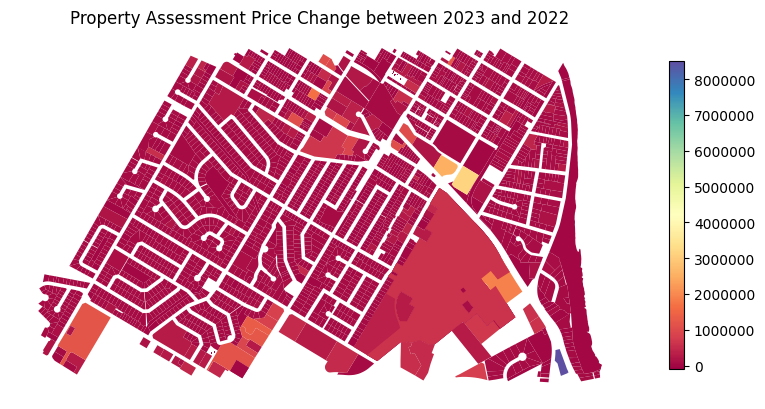

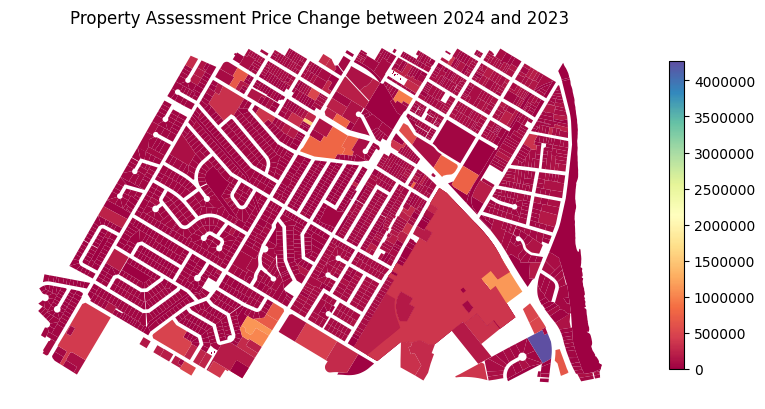

In [4]:
plt.rcParams['axes.formatter.limits'] = (-5, 12)
for ix, (a, b) in enumerate(years):
    df[f'{b}_{a}'] = df[b] - df[a]
    df.plot(column=f'{b}_{a}', cmap='Spectral', figsize=(10, 10), legend=True, legend_kwds={'shrink': 0.4})
    plt.title(f'Property Assessment Price Change between {b} and {a}')
    plt.axis('off')
    plt.savefig(f'image{ix}.png', bbox_inches='tight', dpi=600)
    # plt.close()

In [5]:
%%capture
!ffmpeg -f image2 -framerate 1 -i image%d.png property_assessment_change.gif